## Import dataset & define independent and dependent variable

In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('Datasets/Salary_Data.csv')

X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1].values

## Visualize the data

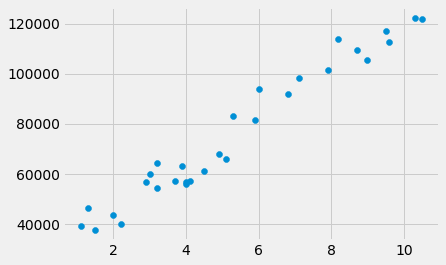

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(X, y)
plt.show()

## scikit-learn

model1:
w = [9449.96232146] and b=25792.20019866871

predicting salary for 7.3 years of experience
prediction: [94776.92514529]


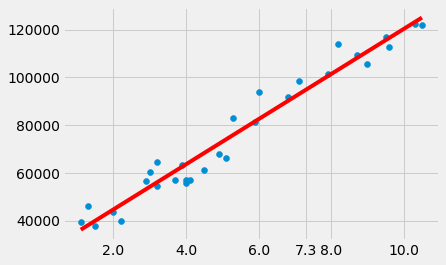

In [4]:
from sklearn.linear_model import LinearRegression

linreg_model1 = LinearRegression().fit(X, y)

print(f'model1:\nw = {linreg_model1.coef_} and b={linreg_model1.intercept_}\n')

print(f'predicting salary for 7.3 years of experience\nprediction: {linreg_model1.predict([[7.3]])}')

plt.scatter(X, y)
plt.plot(X, linreg_model1.predict(X), color = 'red')
plt.xticks([2, 4, 6, 7.3, 8, 10])
plt.show()

## statsmodels.api

In [5]:
import statsmodels.api as sm

X_new = sm.add_constant(X)

linreg_model2 = sm.OLS(endog = y, exog = X_new).fit()
linreg_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.955     
Dependent Variable: y                AIC:                606.8823  
Date:               2020-07-14 11:32 BIC:                609.6847  
No. Observations:   30               Log-Likelihood:     -301.44   
Df Model:           1                F-statistic:        622.5     
Df Residuals:       28               Prob (F-statistic): 1.14e-20  
R-squared:          0.957            Scale:              3.3505e+07
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
const     25792.2002 2273.0534 11.3469 0.0000 21136.0613 30448.3391
x1         9449.9623  378.7546 24.9501 0.0000  8674.1187 10225.8059
-------------------------------------------------------------------
Omnibus:                2.140        Durbin-Watson:           1.648
Prob(Omnibus):          0.343        Jarque-Bera (JB):        1.569
Skew:                   0.363        Prob(JB):                0.456
Kurtosis:               2.147        Condition No.:           13   
===================================================================

"""

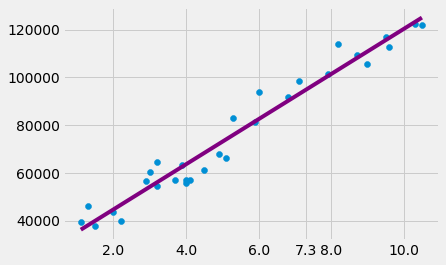

In [6]:
plt.scatter(X, y)
plt.plot(X, linreg_model2.predict(X_new), color = 'purple')
plt.xticks([2, 4, 6, 7.3, 8, 10])
plt.show()

## Gradient Descent

m = 9449.962323709779 and b = 25792.200183474863


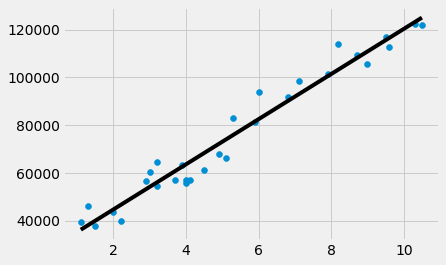

In [18]:
w, b, learning_rate, n, num_of_iterations = 0, 0, .01, len(y), 10000

X = X.flatten()

for _ in range(num_of_iterations):
    ddw = - 1/n * sum((y - w*X - b) * X)
    ddb = - 1/n * sum(y - w*X - b)
    w = w - (ddw * learning_rate)
    b = b - (ddb * learning_rate)
    
print(f'm = {w} and b = {b}')

y_pred_gd = [(b + w*x) for x in X]

plt.scatter(X, y)
plt.plot(X, y_pred_gd, color = 'black')
plt.show()

## Normal Equation

In [61]:
x = np.asmatrix(X_new)
y = y.reshape(len(y), 1)

x_transpose_x_inverse = np.linalg.inv(x.T * x)
x_transpose_y = x.T * y

intercept_and_coefficient = x_transpose_x_inverse * x_transpose_y

b = intercept_and_coefficient[0, 0]
w = intercept_and_coefficient[1, 0]

print(f'm = {w} and b = {b}')

m = 9449.962321455074 and b = 25792.200198668754
